<a href="https://colab.research.google.com/github/nadah09/MachineAuditionHighSchool/blob/main/soundOfAI_6_3_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sound of AI: An Overview of Signals**

**Student Name: [INSERT NAME HERE]**

Welcome to the Sound of AI pilot! Throughout this interactive notebook, we will be discussing the music that we hear, and the properties it has that make it sound different. Make sure you put your name in the block above, and we'll get started. 

A signal has three very important components to it. The first we will talk about is amplitude. 

# Amplitude and Volume

The first element of signals we will focus on is amplitude. The amplitude of a signal affects the volume of the music we hear. What does this look like visually?

We can view music signals as a wave. We see an image of this below:
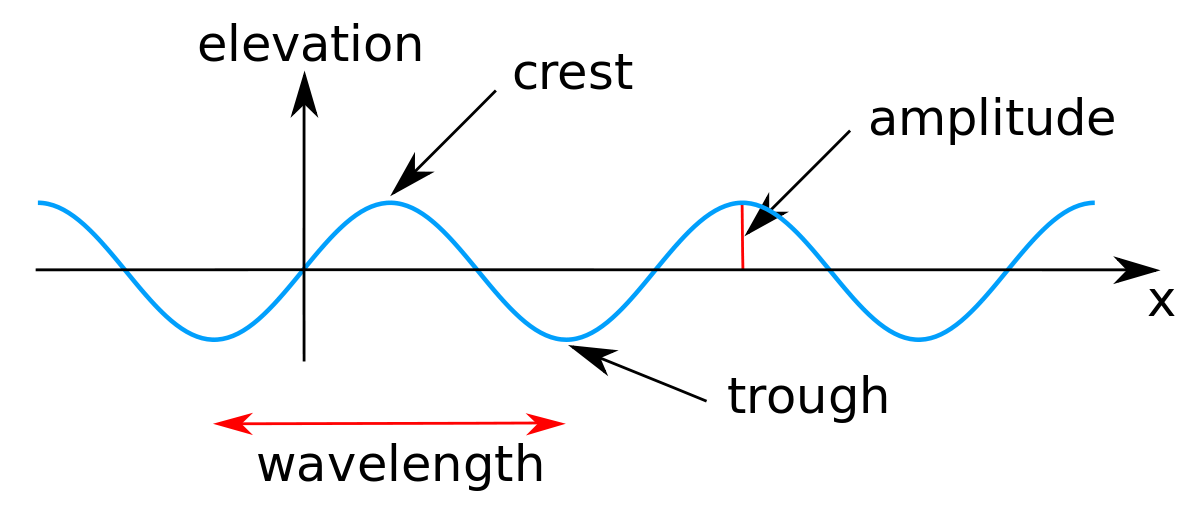


Essentially, when we hear music, we hear a wave like this one moving through the air before it reaches our ears. On this graph, we see a wave moving through space. We see that the highest point of each cycle of the wave is called a crest, and the lowest point is the trough. On this graph, we seen amplitude labelled: we measure amplitude from the midpoint of the signal's height to the top of the crest. If the amplitude gets larger, the volume we hear is louder. If it gets smaller, the volume we hear is quieter. 

## Amplitude Activities

Great! With that under our belt, it's time to start working with some real music. Before we get started, run the following block of code to download all the libraries we'll need for these activities. 

In [ ]:
!wget "https://sigproc.mit.edu/_static/spring21/software/lib6003-0.0.4.tar.gz"
!tar -xvf lib6003-0.0.4.tar.gz
!cd lib6003-0.0.4 && /usr/local/bin/python setup.py install
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install pyaudio

--2021-06-03 06:43:19--  https://sigproc.mit.edu/_static/spring21/software/lib6003-0.0.4.tar.gz
Resolving sigproc.mit.edu (sigproc.mit.edu)... 18.25.4.177
Connecting to sigproc.mit.edu (sigproc.mit.edu)|18.25.4.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21264 (21K) [application/x-tar]
Saving to: ‘lib6003-0.0.4.tar.gz.3’

lib6003-0.0.4.tar.g 100%[===================>]  20.77K  --.-KB/s    in 0s      

2021-06-03 06:43:19 (56.1 MB/s) - ‘lib6003-0.0.4.tar.gz.3’ saved [21264/21264]

lib6003-0.0.4/
lib6003-0.0.4/LICENSE
lib6003-0.0.4/MANIFEST.in
lib6003-0.0.4/PKG-INFO
lib6003-0.0.4/README
lib6003-0.0.4/lib6003/
lib6003-0.0.4/lib6003/__init__.py
lib6003-0.0.4/lib6003/audio.py
lib6003-0.0.4/lib6003/fft.py
lib6003-0.0.4/lib6003/image.py
lib6003-0.0.4/lib6003/wavfile.py
lib6003-0.0.4/lib6003.egg-info/
lib6003-0.0.4/lib6003.egg-info/PKG-INFO
lib6003-0.0.4/lib6003.egg-info/SOURCES.txt
lib6003-0.0.4/lib6003.egg-info/dependency_links.txt
lib6003-0.0.4/lib6003.egg-

Once these have downloaded, we need to hit Runtime -> Restart runtime before running the cell below to import the libraries into the notebook.

In [ ]:
from lib6003.audio import wav_read, wav_write, wav_play
from math import sin, cos, pi, e, log
import pyaudio
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import IPython
import math
import scipy.signal
import numpy as np

Now that we have our libraries set up, we can begin working with some music! First, we need to make a music file to work with. For now, don't worry about the next block of code -- just run it to create a music file. We will get more into the details of this when we learn about frequency in the next section.

In [ ]:
fs = 22050
tune = [
    (369.99, 0.16666666666666666), (415.3, 0.16666666666666666),
    (440.0, 0.5), (369.99, 0.5), (369.99, 0.3333333333333333),
    (369.99, 0.16666666666666666), (369.99, 0.3333333333333333),
    (369.99, 0.3333333333333333), (329.63, 0.16666666666666666),
    (369.99, 0.3333333333333333), (369.99, 0.3333333333333333),
    (329.63, 0.16666666666666666), (329.63, 0.5),
    (246.94, 0.3333333333333333), (493.88, 0.3333333333333333),
    (246.94, 0.3333333333333333), (493.88, 0.3333333333333333),
    (369.99, 0.16666666666666666), (415.3, 0.16666666666666666),
    (440.0, 0.5), (369.99, 0.5), (369.99, 0.3333333333333333),
    (369.99, 0.16666666666666666), (369.99, 0.3333333333333333),
    (369.99, 0.3333333333333333), (329.63, 0.16666666666666666),
    (369.99, 0.3333333333333333), (369.99, 0.3333333333333333),
    (329.63, 0.16666666666666666), (329.63, 0.5),
    (246.94, 0.3333333333333333), (493.88, 0.3333333333333333),
    (246.94, 0.3333333333333333), (493.88, 0.6666666666666666),
    (277.18, 0.3333333333333333), (369.99, 0.3333333333333333),
    (415.3, 0.3333333333333333), (440.0, 0.3333333333333333),
    (415.3, 0.16666666666666666), (440.0, 0.16666666666666666),
    (415.3, 0.16666666666666666), (369.99, 0.16666666666666666),
    (415.3, 0.3333333333333333), (369.99, 0.3333333333333333),
    (277.18, 1.3333333333333333), (246.94, 1.1666666666666665),
    (277.18, 0.16666666666666666), (277.18, 0.3333333333333333),
    (369.99, 0.3333333333333333), (415.3, 0.3333333333333333),
    (440.0, 0.3333333333333333), (415.3, 0.6666666666666666),
    (369.99, 0.6666666666666666), (277.18, 1.3333333333333333),
    (246.94, 1.3333333333333333), (277.18, 0.3333333333333333),
    (369.99, 0.3333333333333333), (415.3, 0.3333333333333333),
    (440.0, 0.3333333333333333), (415.3, 0.16666666666666666),
    (440.0, 0.16666666666666666), (415.3, 0.16666666666666666),
    (369.99, 0.16666666666666666), (415.3, 0.3333333333333333),
    (369.99, 0.3333333333333333), (277.18, 1.3333333333333333),
    (246.94, 1.1666666666666665), (277.18, 0.16666666666666666),
    (277.18, 0.3333333333333333), (369.99, 0.3333333333333333),
    (415.3, 0.3333333333333333), (440.0, 0.3333333333333333),
    (415.3, 0.6666666666666666), (369.99, 0.6666666666666666),
    (277.18, 1.3333333333333333), (246.94, 1.3333333333333333),
    (277.18, 1.3333333333333333)]
  
def make_tune(tune):
    """
    Constructs wav file samples from frequency, duration list of notes and sampling rate
    """
    period = 0
    samples = []
    for freq, duration in tune:
        period += duration
        f = freq
        seconds = duration
        Omega = 2*pi*f/fs
        for n in range(int(seconds*fs)): # TODO: how many samples should we generate?
            samples.append(sin(Omega*n))
    return samples

def plot_signal(signal, name):
  plt.title(name)
  plt.plot(signal, '-b')
  plt.show()

samples = make_tune(tune)
wav_write(samples, fs, "tune.wav")

Great! Now we have a file, called tune.wav, that we can play with. Listen to the file by running the block below:

In [ ]:
print("TUNE")
IPython.display.Audio('tune.wav')

TUNE


To begin, let's look at this signal up close. In the block below, we've zoomed into the first 1000 samples of the signal, so we can see what it looks like. What is the amplitude of this signal?

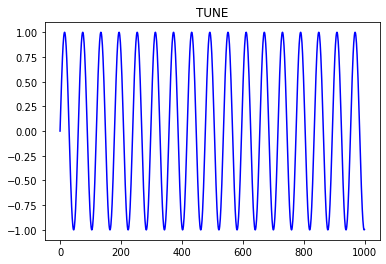

In [ ]:
plot_signal(samples[0:1000], "TUNE")

[ANSWER HERE: WHAT IS THE AMPLITUDE OF THIS SIGNAL?]

### Amplitude: Activity 1

We can now start modifying the volume of our file! Because amplitude is simply a change in the height of a signal, we can modify the volume of a signal by multiplying or dividing every single sample in the file by the same number to increase or decrease the volume. We've included code to do this below:

In [ ]:
def adjust_volume(samples, volume = 1):
  """
  Reconstructs wav file given a list of samples from make_tune and a percentage change in volume (1 = same volume, 0.5 = half volume, 2 = double volume)
  """
  return [i*volume for i in samples]

To run this function, we need to give it our tune, as well as a volume change. Here, if we gave it a 2, we would double the volume, whereas a 0.5 would half the volume. Fill in the code below to make a file that is twice as loud as the original:

In [ ]:
samples = samples
name = "doubled"
doubled = #TODO: write code to make the same tune with twice the volume
wav_write(doubled, fs, "doubled.wav")


SyntaxError: ignored

Let's plot it!

In [ ]:
plot_signal(doubled[0:1000], name)

What do you notice about your new signal? How has it changed from the original?

[ANSWER HERE: HOW IS YOUR SIGNAL DIFFERENT?]

Now let's play back our new file! 

In [ ]:
print("DOUBLED")
IPython.display.Audio('doubled.wav')

How does the new signal sound?

[ANSWER HERE: HOW DOES THE NEW SIGNAL SOUND?]

Now that we've doubled the signal, let's cut the volume in half now! Add your code for halving the volume below, and then plot and play your signal.

In [ ]:
samples = samples
name = "halved"
halved = #TODO: write code to make the same tune with half the volume
wav_write(halved, fs, "halved.wav")
plot_signal(halved[0:1000], name)
print("HALVED")
IPython.display.Audio('halved.wav')

Again, what do you notice about both the signal and the sound it creates?

[ANSWER HERE: HOW DID THE SIGNAL AND THE SOUND CHANGE?]

### Amplitude: Activity 2

Great! Let's move on to another method of approaching volume. This time, we will provide an original signal's plot, as well as a plot after we have adjusted the volume. Now it's your job to figure out how much we adjusted the amplitude, and use our adjust_volume function to recreate our resulting graph. Run the following block of code to generate a tune (again, don't worry too much about this code for now.) Feel free to listen to the original file.

In [ ]:
tune = [(440, 0.5), (880, 0.5)]
samples = make_tune(tune)
wav_write(samples, fs, "mystery_original.wav")
print("MYSTERY")
IPython.display.Audio('mystery.wav')

Now, the first hundred samples of this tune look like the graph seen below:
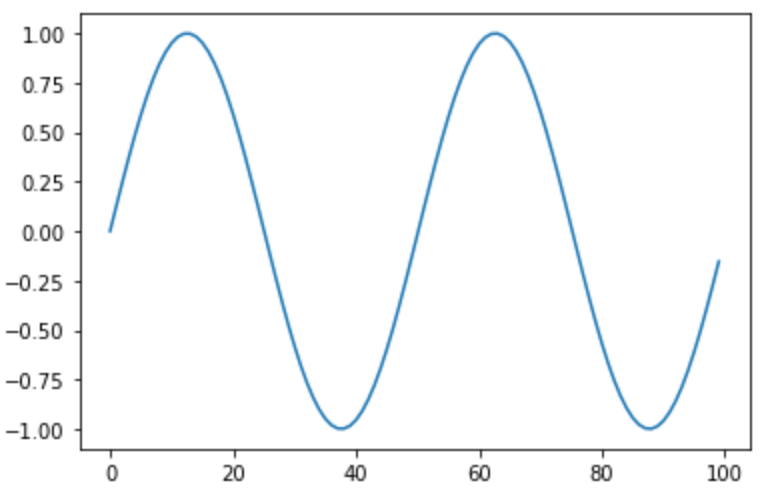

Now, here is the new graph that results from our change in amplitude. Note that the only change made to our signal is an adjustment in amplitude.

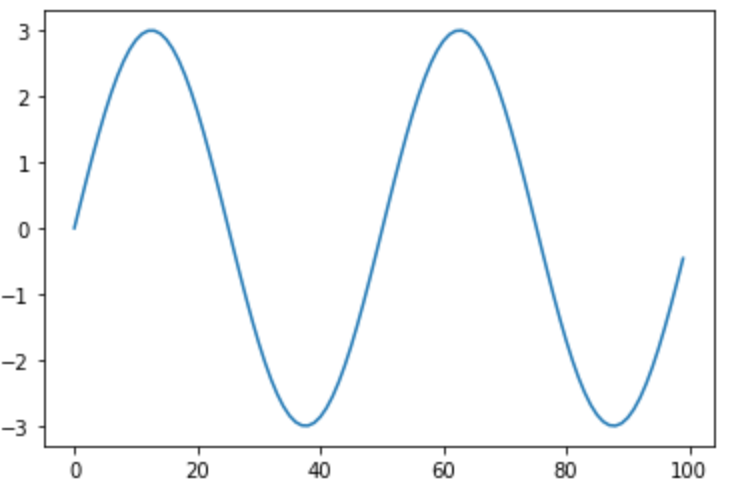

Using the adjust volume function, create a new tune that matches this plot. Plot your result, and play back your file.

In [ ]:
samples = samples
name = "mystery"
mystery = #TODO: write code to make the same tune as plotted above
wav_write(mystery, fs, "mystery.wav")
plot_signal(mystery[0:100], name)
print("MYSTERY")
IPython.display.Audio('mystery.wav')

How did you decide on the correct volume change?

[ANSWER HERE: HOW DID YOU CHOOSE YOUR VOLUME?]

Great! you've successfully completed the amplitude module for today. Let's move on to frequency!

# Frequency and Pitch

The pitch of a music signal affects what note we hear. Think the difference between a high-pitched and a low-pitched note. Let's revisit our diagram from before:
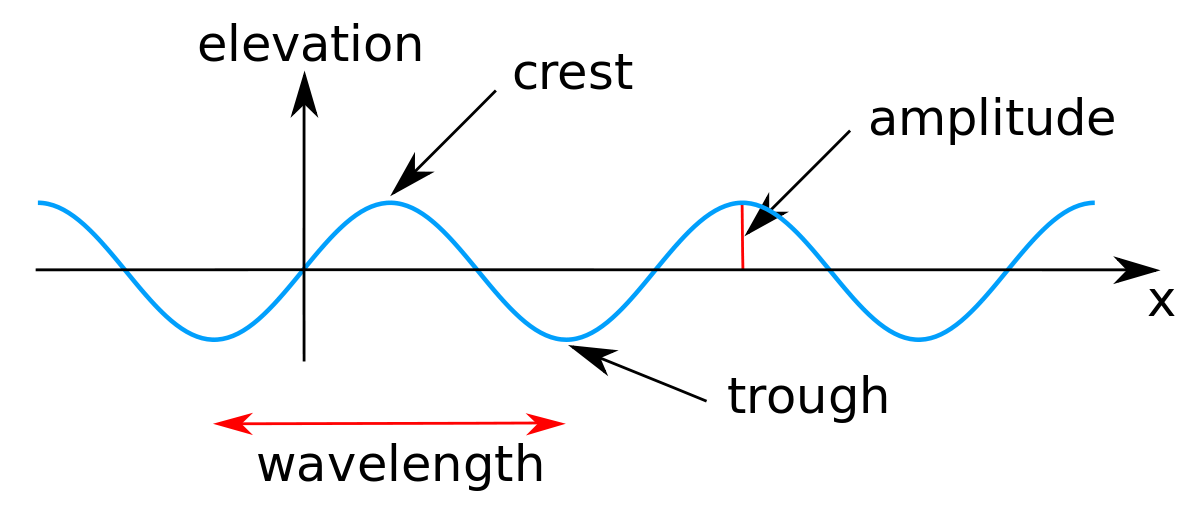

In this image, we can see what corresponds to the frequency, or pitch, of a music signal. We define a wavelength as the distance along the x axis that it takes for a signal to go through one cycle -- say, from trough to trough or crest to crest. Frequency is measured by how quickly a signal goes through one cycle. For example, we can think of frequencies as 'cycles per second', where if our signal goes through a cycle faster, or has a shorter wavelength, it is higher frequency and higher pitched, but if it goes through a cycle slower, and has a longer wavelength, it has a lower frequency and is lower pitched. 

Let's experiment with this idea. Below we define a short signal. Now we can explain what these tune lists are -- we can define a piece of music with a list of tuples, where each tuple first specifies a frequency in Hz, as well as a duration in seconds to play that note for. With this, we can make, plot, and play sounds as we want. Run the following code:

In [ ]:
fs = 2000
tune1 = [(100, 0.5)]
tune2 = [(200, 0.5)]
samples = make_tune(tune1)[0:100]+make_tune(tune2)[0:100]
plot_signal(samples, "freqComparison")

Here we can get a better look at what we mean. We have two tunes, one has a frequency of 100Hz (a unit of measurement for measuring cycles per second) and another of 200Hz. Here we can see -- the 100Hz section moves slower, and has a larger wavelength. However, the 200Hz section moves faster and has a smaller wavelength. However, if we plot a more complex signal, this plot becomes pretty useless. Run the block below:

In [ ]:
fs = 22050
tune = [(440.0, 0.5), (880.0, 0.5)]
samples = make_tune(tune)
plot_signal(samples, "freqComparison")

Here, our signal is way too high frequency, and theres no way to see what's going on! Luckily, we have an operation called a Fourier Transform -- the idea behind this is we can simply visualize all existing frequencies in the signal, instead of trying to infer it from our wave. The code for this is below.

In [ ]:
def plotFFT(samples):
  """
  Plots magnitude response of signal
  """
  w, H = scipy.signal.freqz(samples)
  w = [i*fs/(pi*2) for i in w]
  plt.stem(w, np.abs(H))
  plt.xlim(0, 1000)
  plt.title("Frequencies")
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("Amplitude")
  plt.show()

Let's try this on our tune.

In [ ]:
plotFFT(samples)

Although we get some artifacts, here we are able to see exactly what we expected: two frequencies, one at 440 Hz, and another at 880 Hz like our tune. However, there is something important to note here. What happens if we plot this signal with the note order flipped?

In [ ]:
tune = [(880.0, 0.5), (440.0, 0.5)]
samples = make_tune(tune)
plotFFT(samples)

We get almost the exact same plot! This is due to the fact that this frequency representation is time-independent, meaning that the order of our notes does not matter. If we want to see the time information for our signal, we need to use a spectrogram, which plots frequencies over time. Below is code for plotting a spectrogram:

In [ ]:
#SPECTROGRAM CODE: DO NOT MODIFY
window_size = 2**10
step_size = 2**10

def fft(x):
    if len(x) == 1:
        return x
    N = len(x)
    x_even = x[0::2]
    x_odd = x[1::2]
    X_even = fft(x_even)
    X_odd = fft(x_odd)

    return [1/2*(X_even[i]+e**(-2*j*pi*i/N)*X_odd[i]) for i in range(N//2)] + [1/2*(X_even[i]-e**(-2*j*pi*i/N)*X_odd[i]) for i in range(N//2)]
  

def hann(x):
    out = []
    for i in range(x):
        temp = cos(2*pi*i/(x-1))
        out.append(1/2*(1-temp))
    return out

def transpose(x):
    return [[i[j] for i in x] for j in range(len(x[0]))]

def k_to_hz(k, window_size, step_size, sample_rate):
    # return the frequency in Hz associated with bin number k in an STFT with
    # the parameters given above.
    return k*sample_rate/window_size


def hz_to_k(freq, window_size, step_size, sample_rate):
    # return the k value associated with the given frequency in Hz, in an STFT
    # with the parameters given above, rounded to the nearest integer.
    return round(window_size*freq/sample_rate)


def timestep_to_seconds(i, window_size, step_size, sample_rate):
    # return the real-world time in seconds associated with the center of the
    # ith window in an STFT using the parameters given above, rounded to the
    # nearest .01 seconds.
    return round((i*step_size+window_size/2)/sample_rate, 2)

def stft(x, window_size, step_size, sample_rate):
    nsteps = (len(x)-window_size)//step_size + 1
    out = []
    hann_ = hann(window_size)
    for i in range(nsteps):
        samples = x[i*step_size:i*step_size+window_size]
        samples = [samples[i]*hann_[i] for i in range(window_size)]
        fft_ = fft(x[i*step_size:i*step_size+window_size])
        out.append(fft_)

    return out

def spectrogram(X, window_size, step_size, sample_rate):
    return [[abs(i)**2 for i in j] for j in transpose(X)]


def plot_spectrogram(sgram, window_size, step_size, sample_rate):
    # the code below will uses matplotlib to display a spectrogram.  it uses
    # your k_to_hz and timestep_to_seconds functions to label the horizontal
    # and vertical axes of the plot.
    # amplitudes are plotted on a log scale, since human perception of loudness
    # is roughly logarithmic.
    width = len(sgram[0])
    height = len(sgram)//16+1  # only plot values up to N/2

    tmp = [[(float('inf') if 0 >= x else x) for x in row] for row in sgram[:height+1]]
    smallest = min(min(row) for row in tmp)
    plt.imshow([[log(smallest if i == 0 else i) for i in j] for j in sgram[:height+1]], aspect=width/height)

    #plt.imshow([[log(i) for i in j] for j in sgram[:height+1]], aspect=width/height)
    plt.axis([0, width-1, 0, height-1])

    ticks = ticker.FuncFormatter(lambda x, pos: '{0:.1f}'.format(timestep_to_seconds(x, window_size, step_size, sample_rate)))
    plt.axes().xaxis.set_major_formatter(ticks)
    ticks = ticker.FuncFormatter(lambda y, pos: '{0:.0f}'.format(k_to_hz(y, window_size, step_size, sample_rate)))
    plt.axes().yaxis.set_major_formatter(ticks)

    plt.xlabel('time [s]')
    plt.ylabel('frequency [Hz]')

    plt.colorbar()
    plt.show()

Below we show the spectrogram for the first tune vs. the second tune.

In [ ]:
j = 1j
tune1 = [(440.0, 0.5), (880.0, 0.5)]
tune2 = [(880.0, 0.5), (440.0, 0.5)]

samples1 = make_tune(tune1)
samples2 = make_tune(tune2)

stft1 = stft(samples1, window_size, step_size, fs)
stft2 = stft(samples2, window_size, step_size, fs)

specgram1 = spectrogram(stft1, window_size, step_size, fs)
specgram2 = spectrogram(stft2, window_size, step_size, fs)

plot_spectrogram(specgram1, window_size, step_size, fs)
plot_spectrogram(specgram2, window_size, step_size, fs)

This looks much better! Here we can read the spectrogram such that the bright yellow lines across denote a frequency being played at that frequency for as long as that line stretches across our time axis. We can tell that the first tune plays first 440, then 880, while the second tune plays first 880, then 440. 

Now it's your turn! Try to make a small, 2-3 note sequences following the format above, and see what your plots look like!

In [ ]:
tune3 = [(440, 0.5), (880, 0.5)] #TODO: Replace this with your own tune!

samples3 = make_tune(tune3)
stft3 = stft(samples3, window_size, step_size, fs)

specgram3 = spectrogram(stft3, window_size, step_size, fs)

plot_spectrogram(specgram3, window_size, step_size, fs)

What do you notice about your plot? Does it look how you expected?

[ANSWER HERE]

### Frequency: Activity 1

Now it's time for some challenges!

First, let's supposed we have the following frequency plot:
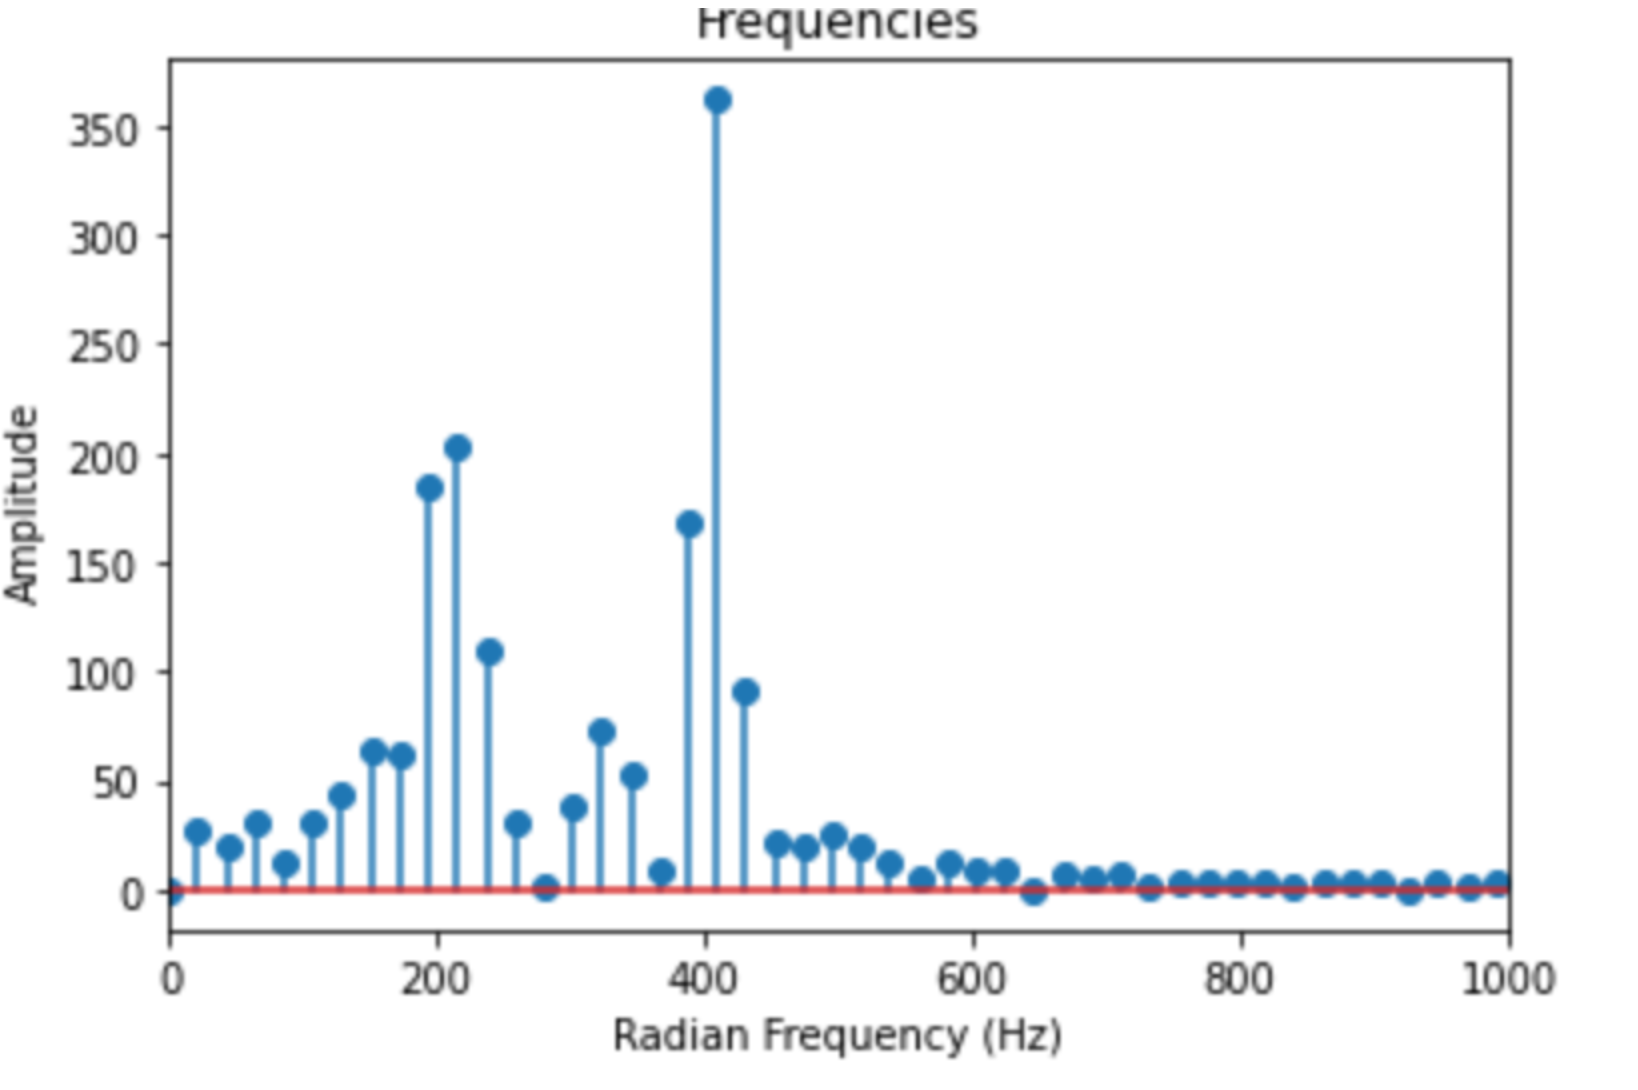

Now it's your job to come up with a possible signal that could have created this plot. You can just estimate what frequency values, and make sure each duration is 0.5 for ease. Add your tune to the following block, and make sure it matches!

In [ ]:
tune = #TODO: Come up with the correct tune here!
samples = make_tune(tune)
plotFFT(samples)

Now, there is one more possible tune here. Come up with another tune that can construct this plot.

In [ ]:
tune2 = #TODO: Come up with the correct tune here!
samples2 = make_tune(tune2)
plotFFT(samples2)

What do you notice about these signals? How does the first tune compare to the second tune?

In [ ]:
[ANSWER HERE]

### Frequency: Activity 2

Now we'll get a bit more picky with our reconstructions using spectrograms. Below is a spectrogram of a two note sequence:
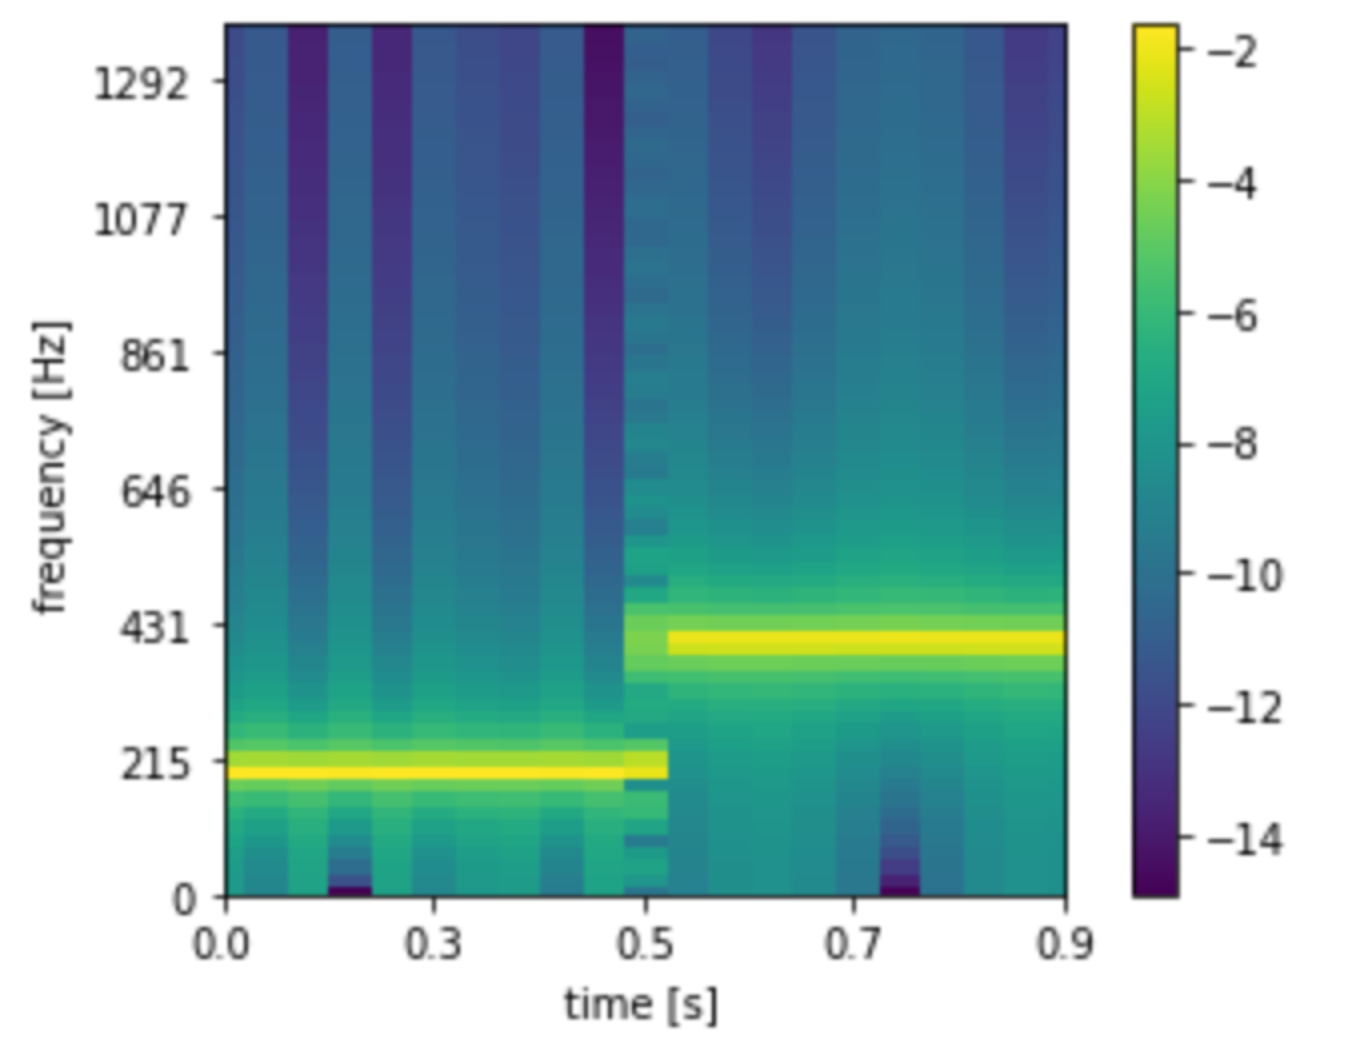

Now it's up to you to come up with the approximate equence that was used to create this plot. Fill in the code below to do so!

In [ ]:
tune3 = #TODO: Come up with the correct tune here!
samples3 = make_tune(tune3)
stft3 = stft(samples3, window_size, step_size, fs)

specgram3 = spectrogram(stft3, window_size, step_size, fs)

plot_spectrogram(specgram3, window_size, step_size, fs)

What was different about finding this tune vs. finding them from the frequency plot? What do you notice about added considerations here?

In [ ]:
[ANSWER HERE]

We've now completed the frequency portion of today! Next week, we will move into timbre, and explore how different instruments sound the way they do even when they play the same note.

# Wrapping up

We've successfully gone through the signals curriculum for today! To wrap up, make sure that you go to File -> Download -> Download as .ipynb, and be sure to send this to us now that it's complete. Thanks, and we'll see you next week!